# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## Exercises 07. Image of a Neutron Star
### About this notebook

In this worksheet we use the `astropy` package to read a .fits file and visualize an astronomical image of a neutron star.

---

In this lesson we will use the datafiles provided in the course *Data-Driven Astronomy* by the University of Sydney.

https://www.coursera.org/learn/data-driven-astronomy


The .fits images correspond to the images of a region of the sky in which a neutron star or pulsar have been observed. The 4 files can be downloaded from

https://github.com/ashcat2005/data-driven-astronomy/tree/master/week1/data3




---
### Images of the .fits files


In [ ]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
%matplotlib inline

In [ ]:
path='' #Define an empty string to use in case of local working

In [ ]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/07. Data Analysis. Neutron Stars/exercises/data01/'

The first image is

In [ ]:
hdul = fits.open(path+'image0.fits')

The method `.info()` returns a summary of the content of the FITS file.

In [ ]:
hdul.info()

Filename: /content/drive/MyDrive/Colab Notebooks/CA2021/06. Data Analysis. Neutron Stars/presentation/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


The header of the primary HDU has the following information

In [ ]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  200                                                  
NAXIS2  =                  200                                                  
NUM     =                 1700                                                  
P       = 'P       '                                                            

Now, lets see the data,

In [ ]:
image_data = hdul[0].data
hdul.close()
image_data.shape

(200, 200)

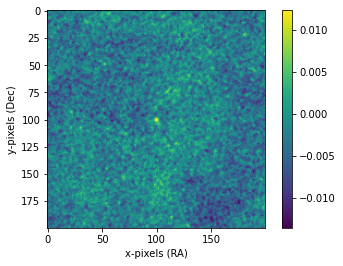

In [ ]:
plt.figure()
plt.imshow(image_data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

The brightest pixel in the middle of the image corresponds to the neutron star. Now we will load and visualize the other images.

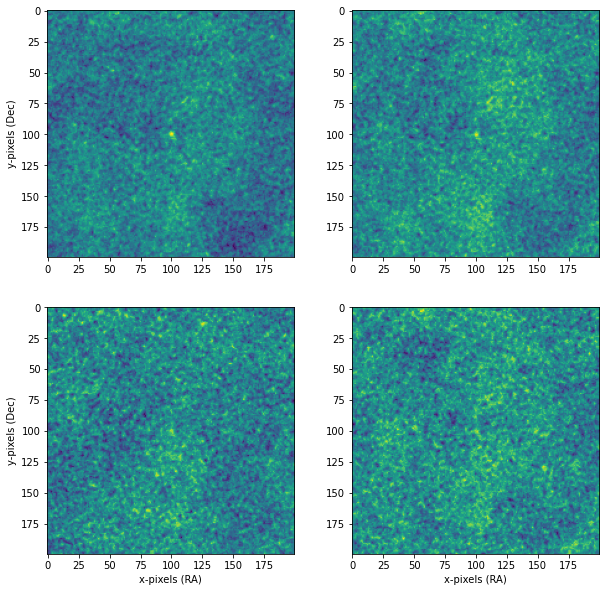

In [ ]:
image_data0 = fits.open(path + 'image0.fits')[0].data
image_data1 = fits.open(path + 'image1.fits')[0].data
image_data2 = fits.open(path + 'image2.fits')[0].data
image_data3 = fits.open(path + 'image3.fits')[0].data

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(image_data0, cmap=plt.cm.viridis)
ax[0,1].imshow(image_data1, cmap=plt.cm.viridis)
ax[1,0].imshow(image_data2, cmap=plt.cm.viridis)
ax[1,1].imshow(image_data3, cmap=plt.cm.viridis)

ax[0,0].set_ylabel(r'y-pixels (Dec)')
ax[1,0].set_ylabel(r'y-pixels (Dec)')
ax[1,0].set_xlabel(r'x-pixels (RA)')
ax[1,1].set_xlabel(r'x-pixels (RA)')
plt.show()



### Image Mean Stacking 

1. Write a function that takes a list of FITS files (with the same dimensions) as an argument, reads them in, and returns the **mean** image data of the FITS files.  Your function should be able to process an arbitrary number of files. 
The mean stack of the .fits files used above will be a 200 x 200 array and the brightest pixel corresponds to the pulsar.

2. Visualize the resulting image. Is the pulsar seen at the center of the image?

3. Obtain the mean value corresponding to the brightest pixel.

### Image Median Stacking 

1. Now, write a function that takes a list of FITS files (with the same dimensions) as an argument, reads them in, and returns the **median** stacking of the FITS files.  Your function should be able to process an arbitrary number of files. 

2. Visualize the resulting image. Is the pulsar seen at the center of the image?

3. Obtain the median value corresponding to the brightest pixel and compare it with the mean value obtained before.